# Inégalités de genre et développement économique 
Camille BALLU, Gaëlle DORMION et Julie NOWACK, 2A ENSAE Paris, Janvier 2022

# Introduction 

Selon l'OCDE, l'Organisme de Coopération et de Développement Economique, "Les économies sont plus résilientes, productives et inclusives lorsqu'elles réduisent les inégalités entre les sexes et soutiennent activement la participation égale des femmes dans toutes les sphères de la vie". L'idée selon laquelle les inégalités de genre freinent le développement tant sur un plan économique qu'humain semble mise en avant ici.

C'est ce qui nous a conduites à étudier le lien entre la situation économique et sociale des femmes et le niveau de développement du pays. Nous avons modélisé le niveau de développement des pays en nous appuyant sur plusieurs indicateurs: le PIB (Produit Intérieur Brut) par tête et l'IDH (Indice de Développement Humain).  

Pour mesurer ce lien, nous avons construit un indicateur multidimensionnel qui évalue l'impact de la condition des femmes sur le développement. En nous inspirant des travaux menés sur le GII (Gender Inequality Index), cet indicateur prend en compte de multiples facettes de la situation des femmes en lien avec leur activité et ressources économiques, leur santé, l'autonomie vis-à-vis de leurs corps, leur éducation, leur représentation au niveau politique, ou encore leur famille. Lorsque cela a été possible, nous avons choisi de comparer la situation des femmes à celle des hommes dans un même pays.

Pour mener ce travail, nous nous appuyons principalement sur les données de l'OCDE et de la Banque mondiale ainsi que des données scrappées. 

Avant de débuter, il est nécessaire d'avoir installé sur son environnement Python les packages sous les versions suivantes: 

- geopandas>=0.10
- numpy>=1.21
- pycountry>=20.7
- pandas>=1.3.4
- PACKAGE JULIE ? 

In [1]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import pycountry 
import urllib
import bs4
from urllib import request
import statsmodels.api as sm

# 1. Travail préalable de récupération des données

## 1.1. Récupération des données sous le format csv

Les données que nous utilisons proviennent de différentes sources. Nous travaillons principalement sur la base WDIData de la Banque Mondiale ainsi que sur la base de 2019 de l'OCDE, mais nous avons dû également scrapper certaines données qui nous paraissaient essentielles à l'étude de la situation des femmes à l'image du taux de fertilité par femme (présent mais de façon incomplète dans la base de donnée de la Banque Mondiale) ou encore du droit à l'avortement, sur des sites comme Wikipédia. Nous avons choisi dans l'ensemble de restreindre l'étude à l'année 2019 qui est la dernière année relativement bien documentée avant l'arrivée de la pandémie. 

Nous avons téléchargé nos fichiers .csv sur les sites suivants:
- Données de la Banque mondiale (fichier CSV "WDIData.csv" disponible à l'adresse suivante: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators?fbclid=IwAR2nT7GW8KtjcMaN6VCc3zAuNVPXsGJ8Ew9AvPACwE4703KmMoyiQuRGkc8). Cette base permet de recueillir des données relatives à la situation économique et sociale d'un pays depuis 1960.  
- Données de l'OCDE (fichier CSV "GIDDB2019_05012022164738556.csv" (et renommé "oecd3.csv" dans la suite du projet) disponible à l'adresse suivante: https://stats.oecd.org/viewhtml.aspx?datasetcode=GIDDB2019&lang=fr). Des données relatives à l'égalité homme-femme y sont disponibles pour l'année 2019. 

- Données de l'Union Interparlementaire, disponibles aux adresses suivantes (3 Data set) : https://data.ipu.org/fr/women-ranking?month=11&year=2021 pour le pourcentage de femmes au sein des parlements, https://data.ipu.org/fr/specialized-bodies/fr?sb_theme=106 pour l'existence d'organe spécialisé dans la question de l'égalité des sexes et https://data.ipu.org/fr/compare?field=chamber%3A%3Afield_is_electoral_quota_women&structure=any__lower_chamber#map pour les données sur l'existence de quotas éllectoraux au parlement des différents pays. 

## 1.2. Scrapping des données

### 1.2.1. Scrapping du taux de fertilité 

In [2]:
#Scrapping du taux de fertilité sur Wikipédia (en anglais)
url_fertility_tx = "https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependencies_by_total_fertility_rate"
request_text = request.urlopen(url_fertility_tx).read() 
page = bs4.BeautifulSoup(request_text, "lxml")
table_fertility_tx = page.find('table', {'class' : 'wikitable sortable'})
table_body = table_fertility_tx.find('tbody')

rows = table_body.find_all('tr')
cols = rows[1].find_all('td')

dico_fertility = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_fertility[cols[1]] = cols[2:]

In [3]:
#On organise les données dans un dataframe
data_fertility = pandas.DataFrame.from_dict(dico_fertility,orient='index')

Il s'agit désormais de nettoyer les données scrappées et de les mettre en forme pour pouvoir les exploiter après. 

In [4]:
#On réorganise tout d'abord les colonnes du dataframe
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_pays = cols

[<th>Rank</th>, <th>Country</th>, <th>Fertility rate <br/> in 2019<br/><small>(births/woman)</small>
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [5]:
data_fertility.columns = columns_pays[2:]
data_fertility.reset_index(inplace=True)
data_fertility.rename(columns={'index': 'Country Name'}, inplace=True)
data_fertility.rename(columns={'Fertility Rate   In 2019 (Births/Woman)': 'Fertility'}, inplace=True)

A l'aide du package pycountry de python, on peut ajouter au dataframe une colonne indiquant le code du pays, présent dans la base de données de la banque mondiale et dans la base de données de l'OCDE  et que nous allons utiliser par la suite pour la création des indicateurs car les pays des deux bases sont donnés respectivement en anglais et en français.

In [6]:
def code_pays(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 est utilisé pour donner le code en 3 lettres du pays
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE# create a column for code 
data_fertility['CODE']=code_pays(data_fertility["Country Name"])

data_fertility.rename(columns={'CODE': 'Country Code'}, inplace=True)

Certaines données du tableau ne sont pas exploitbales et doivent par conséquent être nettoyées, soit parce qu'il n'y a pas de taux de fertilité donné pour ces pays (ex:(-)), soit parce qu'elles relèvent de données d'années antérieures à 2019. Nous faisons le choix pour ces pays de remplacer le taux de fertilité de 2019 par ces données antérieures, afin d'avoir une base aussi complète que possible, en faisant l'hypothèse que le taux de fertilité pour ces pays a probablement peu changé en l'espace de quelques années. 

In [7]:
data_fertility2=data_fertility

In [8]:
def cleaner_fertility(char: str ):
    try:
        if '-' in char : return np.NaN
        elif '(' in char :
            i=0
            while char[i+1]!='(':
                i+=1
            return float(char[:i])
        else: return float(char)
    
    except:
        return char

In [9]:
data_fertility2.dropna(inplace=True)#fonction qui enlève les potentiels "NaN" présents
data_fertility2["Fertility"] = data_fertility2["Fertility"].apply(cleaner_fertility)
data_fertility2

,Country Name,Fertility,Country Code
0,Niger,6.824,NER
1,Somalia,5.978,SOM
2,DR Congo,5.819,None
3,Mali,5.785,MLI
4,Chad,5.649,TCD
...,...,...,...
259,Saint Kitts and Nevis,2.1,KNA
260,Turks and Caicos Islands,NaN,TCA
261,Tuvalu,NaN,TUV
262,Vatican City,NaN,None


In [10]:
# Exportation en .csv 
data_fertility2.to_csv('data_fertility2.csv')

### 1.2.2. Scrapping de la législation sur l'avortement 

On scrappe des données relatives à la législation sur l'avortement sur le site Wikipédia ("https://en.wikipedia.org/wiki/Abortion_law").

In [11]:
url_abortion_law = "https://en.wikipedia.org/wiki/Abortion_law"
request_text = request.urlopen(url_abortion_law).read() 
page = bs4.BeautifulSoup(request_text, "lxml")
table_abortion_law = page.find('table', {'class' : 'wikitable sortable collapsible'})
table_body = table_abortion_law.find('tbody')

rows = table_body.find_all('tr')
cols = rows[1].find_all('td')

dico_abortion = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_abortion[cols[0]] = cols[1:]

In [12]:
data_abortion = pandas.DataFrame.from_dict(dico_abortion,orient='index')

On nettoie ensuite le dataframe. On choisit de créer une indicatrice traduisant la possibilité pour les femmes d'avorter ou non par choix (1: possibilité d'avorter par choix, 0: impossibilité). 

In [13]:
# Fonction qui va servir pour le nettoyage de la base de données
def cleaner_abortion (char: str):
    assert type(char)==str, "The row does not contains str"
    if '-' in char: return np.NaN
    elif '[' in char:
        i=0
        while char[i+1]!= '[':
            i+=1
        return str(char[:i+1])
    else: return str(char)

In [14]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_country = cols

[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="width:70px">On request
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="width:70px">On request
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[<th>Country</th>, <th style="width:70px">Risk to life</th>, <th style="width:70px">Risk to health</th>, <th style="width:70px">Rape</th>, <th style="width:70px">Fetal impairment</th>, <th style="width:70px">Economic or social</th>, <th style="widt

In [15]:
data_abortion.columns = columns_country[1:]
data_abortion.reset_index(inplace=True)
data_abortion.rename(columns={'index': 'Country Name'}, inplace=True)
data_abortion.head()

,Country Name,Risk To Life,Risk To Health,Rape,Fetal Impairment,Economic Or Social,On Request
0,Abkhazia[32],prohibited,prohibited,prohibited,prohibited,prohibited,prohibited
1,Afghanistan[needs update?],permitted[k],prohibited,prohibited,prohibited[k],prohibited[k],prohibited
2,Albania[16],22 weeks,22 weeks,22 weeks,no limit,22 weeks,12 weeks
3,Algeria[39],permitted,permitted,prohibited,prohibited,prohibited,prohibited
4,Andorra,prohibited[l],prohibited,prohibited,prohibited,prohibited,prohibited


In [16]:
data_abortion2=data_abortion
data_abortion2['abortion'] = data_abortion2['On Request'].str.contains("permitted|weeks", na=False).astype(int)
data_abortion2["Country Name"]=data_abortion2["Country Name"].apply(cleaner_abortion)
data_abortion2=data_abortion2[["Country Name", "abortion"]]
data_abortion2.head(5)

,Country Name,abortion
0,Abkhazia,0
1,Afghanistan,0
2,Albania,1
3,Algeria,0
4,Andorra,0


In [17]:
# Exportation en .csv 
data_abortion2.to_csv('data_abortion2.csv')

## 1.3. Nettoyage des bases de données de la Banque mondiale et de l'OCDE

### 1.3.1. Df de la Banque mondiale

In [18]:
# Dataframe de la Banque mondiale 
df_bm=pd.read_csv("WDIData.csv")
df_bm.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN


In [19]:
# On se restreint aux observations de 2019
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


### 1.3.2. Df de l'OCDE

In [20]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [21]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code', 'Pays':'Country Name'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde3=df_ocde2[['Country Code', 'Country Name', 'VAR', 'Value']]
df_ocde3.head(5)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country Code,Country Name,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


### 1.3.3 Df de l'Union Parlementaire

In [23]:
df_percent_women = pd.read_csv('./chamber--current_women_percent.csv', sep=',', encoding='utf-8')
df_quota = pd.read_csv('./chamber--field_is_electoral_quota_women.csv', sep=',', encoding='utf-8')
df_spe_body = pd.read_csv('./chamber--specialized_body__women.csv', sep=',', encoding='utf-8')

In [24]:
df_percent_women = df_percent_women.iloc[3: , : ]
df_percent_women.drop(df_percent_women.columns[[0]], axis=1, inplace=True)

In [25]:
df_percent_women.columns = ["Country", "Elections (lower house)", "Seats", "Women", "Women proportion (lower house)", "Elections (upper house)", "Seats", "Women", "Women proportion (upper house)"]
df_percent_women = df_percent_women.iloc[2: , : ]
df_percent_women.reset_index(inplace=True, drop=True)

In [26]:
#On ne conserve que les colonnes utiles
df_percent_women2 = df_percent_women[["Country", "Women proportion (upper house)"]]

In [27]:
def nettoyage(df, d, l):
    
    #df est le data frame
    #d représente l'indice des colonnes à supprimer
    #l représente l'indice de lignes à partir duquel il convient de conserver les données
    
    df = df.drop(df.columns[d], axis=1) #On supprime les colonnes vides
    df = df.iloc[l: , : ] #On conserve les lignes comportant les noms des colonnes et les données
    df.columns = df.iloc[0] #On renomme les colonnes
    df.reset_index(inplace=True, drop=True) 
    df = df.iloc[pd.RangeIndex(len(df)).drop(0)] 
    df.reset_index(inplace=True, drop=True)
    return df

In [28]:
df_quota = nettoyage(df_quota, 6, 5)
df_quota.columns = ["2-alpha code", "Country", "House", "Quota", "Structure", "House type"]

In [29]:
#On ne conserve que les colonnes utiles
df_quota = df_quota[["2-alpha code", "Country", "Quota"]]

In [30]:
df_spe_body = nettoyage(df_spe_body, 6, 5)
df_spe_body.columns = ["2-alpha code", "Country", "House", "Specialized body", "Structure", "House type"]

In [31]:
#On ne conserve que les colonnes utiles
df_spe_body2 = df_spe_body[["2-alpha code", "Specialized body"]]

On importe une nouvelle base de données qui nous permet de faire coïncider le code alpha 2 avec le code alpha 3

# 2.Sélection des indicateurs pertinents

- stats descriptives sur les indicateurs de la banque mondiale, ocde,... avec sélection des variables women, female,... 
- parler d'indicateurs pertinents et pas pertinents 
- à la fin mettre le tableau des proportionnalités de Julie

Le premier indicateur que nous avons particulièrement exploité dans le cadre de ce projet est l'indicateur PIB par habitantde 2019 de la Banque Mondiale (""GDP per capita 2019"). Nous avons estimé que cet indicateur serait le plus pertinent pour mesurer le niveau de développement économique du pays dans le cadre denotre étude, bien qu'il soit parfois contesté.

## Quelques fonctions utiles 

In [32]:
def bm_select(Indicator, row_name):

    df=df_bm2[df_bm2['Indicator Code']==Indicator]
    df=df[["Country Code", "2019"]]
    df.rename(columns={'2019':row_name}, inplace=True)
    
    return df

## Le PIB par habitant, 2019 

In [33]:
df_pib=bm_select('NY.GDP.PCAP.KD', "GDP per capita 2019")
df_pib_name=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib_name=df_pib_name[["Country Name","2019", "Country Code"]]
df_pib_name.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)

On effectue quelques statistiques descriptives de ce PIB en le visualisant par aire géographique. Le PIB par tête semble plus élevé là où le droit des femmes semble le plus développé.


In [34]:
liste_continents=['AFE','AFW', 'ARB', 'EAS', 'EUU', 'LCN', 'MEA', 'NAC', 'WLD', 'SAS']
df_pib2=df_pib_name[df_pib_name['Country Code'].isin(liste_continents)]
df_pib2.sort_values("GDP per capita 2019",ascending = True, inplace = True)

<ipython-input-34-d6f51c0e7886>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pib2.sort_values("GDP per capita 2019",ascending = True, inplace = True)


Text(0.5, 0, 'GDP per capita (2019)')

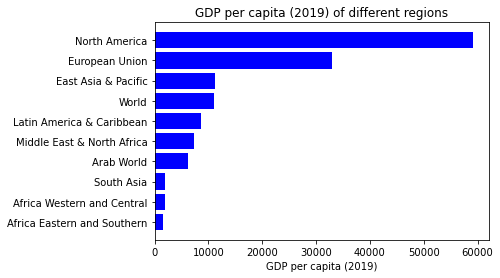

In [35]:
plt.barh(df_pib2["Country Name"], df_pib2['GDP per capita 2019'], color="blue")
plt.title('GDP per capita (2019) of different regions')
plt.xlabel('GDP per capita (2019)')

## Données relatives à la condition des femmes 

Au sein des bases de données de la Banque Mondiale et de l'OCDE, nous avons effectué un gros travail afin de trouver les indicateurs complets et pertinents dans notre cadre d'étude, à savoir celui de l'impact de la condition des femmes sur le niveau de développement économique des pays. Par exemple, nous avons été amenées dans un premier temps à créer des sous-dataframes du dataframe de la Banque Mondiale regroupant les indicateurs contenant les termes "gender", "female" ou encore "women", puis à les examiner pour un seul pays à l'image de la France afin d'en avoir une meilleure visibilité (dans la mesure où l'indicateur existe pour chaque pays). 

In [36]:
df_bm2.rename(columns={'Indicator Name': 'Indicator'}, inplace=True)
df_women=df_bm2[df_bm2.Indicator.str.contains('women', case=False)]
df_gender=df_bm2[df_bm2.Indicator.str.contains('gender', case=False)]
df_female=df_bm2[df_bm2.Indicator.str.contains('female', case=False)]

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Par exemple:

In [37]:
FR=df_women[df_women['Country Name']=="France"]
FR.head()

,Country Code,Country Name,Indicator,Indicator Code,2019
168879,FRA,France,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,4.7454
168918,FRA,France,Antiretroviral therapy coverage for PMTCT (% o...,SH.HIV.PMTC.ZS,NaN
169060,FRA,France,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN
169061,FRA,France,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,NaN
169128,FRA,France,Demand for family planning satisfied by modern...,SH.FPL.SATM.ZS,NaN


Puis nous avons étudié manuellement les indicateurs de ce dataframe et leurs corrélations avec par exemple le PIB par habitants en 2019. Voici quelques exemples de variables qui nous ont semblées pertinentes plutôt que d'autres.

In [74]:
def corr_indicateurs(df1, df2, indicator_name) :
    
    X = df1[df1['Indicator']== indicator_name] # on sélectionne l'indicateur qui nous intéresse
        
    #On supprime la colonne 'Indicator code'
    X = X.drop(['Indicator Code'], axis = 1)
    
    #On supprime la colonne country name de la base PIB
    Y = df2.drop(['Country Name'], axis = 1)
    
    #On fusionne les 2 bases de données
    Z = X.merge(Y, how='inner', on= 'Country Code')
    
    #On supprime les lignes où certaines données sont manquantes
    index_with_nan = Z.index[Z.isnull().any(axis=1)]
    Z.drop(index_with_nan,0, inplace=True)
    print("Le nombre d'obervations est : ", Z.shape[0]) #On affiche le nombre d'observations restantes
    
    #On réalise les graphiques de corrélation
    X_ = Z.iloc[:,3].values
    y_ = Z.iloc[:,4].values
    
    graph = plt.scatter(X_, y_, color="green")
    
    return graph

Le nombre d'obervations est :  225


Text(0, 0.5, 'GDP per capita (2019)')

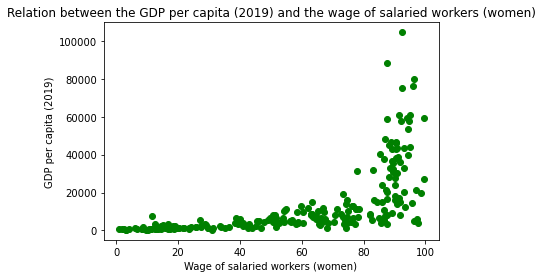

In [75]:
#Graphique de corrélation pour l'indicateur 'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)'

corr_indicateurs(df_female, df_pib_name, 'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)')
plt.title('Relation between the GDP per capita (2019) and the wage of salaried workers (women)')
plt.xlabel('Wage of salaried workers (women) ')
plt.ylabel('GDP per capita (2019)')

Le nombre d'obervations est :  231


Text(0, 0.5, 'GDP per capita (2019)')

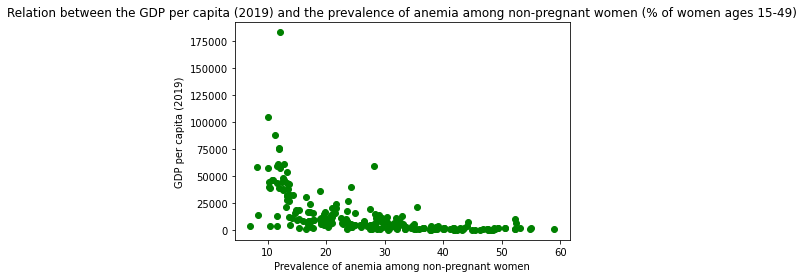

In [76]:
#Graphique de corrélation pour l'indicateur 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)'

corr_indicateurs(df_women, df_pib_name, 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)')
plt.title('Relation between the GDP per capita (2019) and the prevalence of anemia among non-pregnant women (% of women ages 15-49)')
plt.xlabel('Prevalence of anemia among non-pregnant women')
plt.ylabel('GDP per capita (2019)')

Le nombre d'obervations est :  225


Text(0, 0.5, 'GDP per capita (2019)')

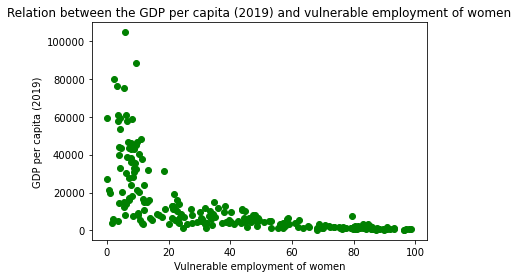

In [77]:
#Graphique de corrélation pour l'indicateur 'Vulnerable employment, female (% of male employment) (modeled ILO estimate)'

corr_indicateurs(df_female, df_pib_name, 'Vulnerable employment, female (% of female employment) (modeled ILO estimate)')
plt.title('Relation between the GDP per capita (2019) and vulnerable employment of women')
plt.xlabel('Vulnerable employment of women')
plt.ylabel('GDP per capita (2019)')

Le nombre d'obervations est :  40


Text(0, 0.5, 'GDP per capita (2019)')

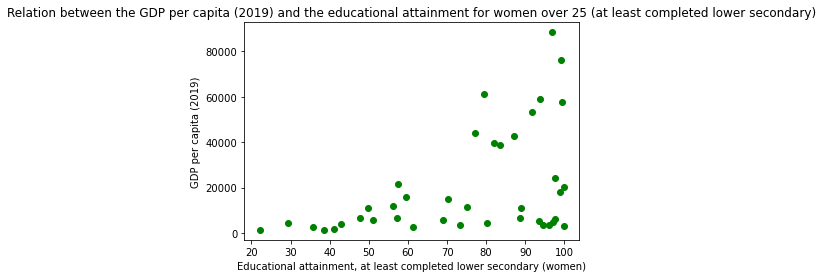

In [78]:
#Exemple d'indicateur non pertinent : Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)

corr_indicateurs(df_female, df_pib_name, 'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)')
plt.title('Relation between the GDP per capita (2019) and the educational attainment for women over 25 (at least completed lower secondary)')
plt.xlabel('Educational attainment, at least completed lower secondary (women)')
plt.ylabel('GDP per capita (2019)')

Nous avons choisi de ne pas intégrer les variables peu renseignées à notre projet. 
Nous avons choisi de retenir au total 17 variables explicatives dans notre base de donnée du projet : 
- Fertility
- Life expectancy of women at birth
- Prevalence of anemia among non pregnant women
- Women share of population living with HIV 
- Domestic time ratio women on men
- Women s share amoung bank account owners 
- Adolescents out of school, female
- Children out of school, female
- Primary completion rate, female
- No contraception used without wanting having children
- Physical and sexual violences on women
- Abortion
- Women on vulnerable job
- Employment to population ratio, 15+, female
- Quota in parliament
- Specialized body (regarding gender equality) in parliament
- Women proportion (upper house)

# 3. Création de la base de données

- je pense qu'ici il faudrait qu'on ait une base globale avec tous les indicateurs pertinets fusionnés de l'OCDE, banque mondiale,... (il me semble que c'est dans les consignes mais pas sure il faudriat vérifier)

# 4. Création des indicateurs dimensionnels des inégalités hommes/femmes

- au début on met les fonctions qui permettent de sélectionner les variables + de normaliser dans la base globale qu'on a créée + pondéraion
- création de chaque indicateur avec pondérations 

# 5. Création de l'indicateur global 

- indicateur global 
- régression

# 6. Statistiques globales sur l'indicateur

- boxplot 
- graph en bâtons par continents 

# 7. Visualisation de l'indicateur 

- carte

# Conclusion